### Covid 19 Numbers Extraction, Cleaning and EDA

In [1]:
# imports
import os
import re
import pandas as pd
import numpy as np
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## read csv dataset
covid19 = pd.read_csv('../datasets/covid_19_data.csv')
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11930 entries, 0 to 11929
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              11930 non-null  int64  
 1   ObservationDate  11930 non-null  object 
 2   Province/State   6267 non-null   object 
 3   Country/Region   11930 non-null  object 
 4   Last Update      11930 non-null  object 
 5   Confirmed        11930 non-null  float64
 6   Deaths           11930 non-null  float64
 7   Recovered        11930 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 745.8+ KB


In [4]:
# rename columns
covid19.columns = covid19.columns.map(lambda x: x.replace(' ', '_'))
covid19.columns = covid19.columns.map(lambda x: x.replace('/', '_'))
covid19.columns = covid19.columns.map(lambda x: x.lower())
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11930 entries, 0 to 11929
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sno              11930 non-null  int64  
 1   observationdate  11930 non-null  object 
 2   province_state   6267 non-null   object 
 3   country_region   11930 non-null  object 
 4   last_update      11930 non-null  object 
 5   confirmed        11930 non-null  float64
 6   deaths           11930 non-null  float64
 7   recovered        11930 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 745.8+ KB


In [5]:
# convert date fields to correct dtypes
covid19.observationdate = pd.to_datetime(covid19.observationdate)
covid19.observationdate = covid19.observationdate.apply(lambda x:x.date())
covid19.last_update = pd.to_datetime(covid19.last_update)
covid19.last_update = covid19.last_update.apply(lambda x:x.date())
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11930 entries, 0 to 11929
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sno              11930 non-null  int64  
 1   observationdate  11930 non-null  object 
 2   province_state   6267 non-null   object 
 3   country_region   11930 non-null  object 
 4   last_update      11930 non-null  object 
 5   confirmed        11930 non-null  float64
 6   deaths           11930 non-null  float64
 7   recovered        11930 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 745.8+ KB


In [6]:
# dropping irrelevant columns
covid19.drop(['sno','last_update'], axis = 1, inplace = True)
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11930 entries, 0 to 11929
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   observationdate  11930 non-null  object 
 1   province_state   6267 non-null   object 
 2   country_region   11930 non-null  object 
 3   confirmed        11930 non-null  float64
 4   deaths           11930 non-null  float64
 5   recovered        11930 non-null  float64
dtypes: float64(3), object(3)
memory usage: 559.3+ KB


In [7]:
duplicate_rows=covid19.duplicated()
covid19[duplicate_rows == True]

,observationdate,province_state,country_region,confirmed,deaths,recovered


In [8]:
covid19[covid19['province_state'] == 'Alaska'].sort_values(by = 'observationdate')

,observationdate,province_state,country_region,confirmed,deaths,recovered
4706,2020-03-10,Alaska,US,0.0,0.0,0.0
4927,2020-03-11,Alaska,US,0.0,0.0,0.0
5148,2020-03-12,Alaska,US,0.0,0.0,0.0
5325,2020-03-13,Alaska,US,1.0,0.0,0.0
5882,2020-03-15,Alaska,US,1.0,0.0,0.0
6154,2020-03-16,Alaska,US,1.0,0.0,0.0
6391,2020-03-17,Alaska,US,3.0,0.0,0.0
6654,2020-03-18,Alaska,US,6.0,0.0,0.0
6936,2020-03-19,Alaska,US,9.0,0.0,0.0
7227,2020-03-20,Alaska,US,12.0,0.0,0.0


In [9]:
#checking for duplicate rows
duplicate_rows=covid19.duplicated(subset=['province_state','country_region','observationdate'])
covid19[duplicate_rows]

,observationdate,province_state,country_region,confirmed,deaths,recovered
4925,2020-03-11,Gansu,Mainland China,0.0,0.0,0.0
4926,2020-03-11,Hebei,Mainland China,0.0,0.0,0.0
5146,2020-03-12,Gansu,Mainland China,0.0,0.0,0.0
5147,2020-03-12,Hebei,Mainland China,0.0,0.0,0.0


In [10]:
country_list=list(covid19['country_region'].unique())
print(country_list)
print (len(country_list))

['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 

In [11]:
print(list(covid19['observationdate'].unique()))
print(len(list(covid19['observationdate'].unique())))

[datetime.date(2020, 1, 22), datetime.date(2020, 1, 23), datetime.date(2020, 1, 24), datetime.date(2020, 1, 25), datetime.date(2020, 1, 26), datetime.date(2020, 1, 27), datetime.date(2020, 1, 28), datetime.date(2020, 1, 29), datetime.date(2020, 1, 30), datetime.date(2020, 1, 31), datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), 

In [12]:
covid19.groupby(['country_region'])['confirmed'].max()

country_region
 Azerbaijan                          1.0
('St. Martin',)                      2.0
Afghanistan                        299.0
Albania                            333.0
Algeria                           1251.0
                                   ...  
Vietnam                            240.0
West Bank and Gaza                 217.0
Zambia                              39.0
Zimbabwe                             9.0
occupied Palestinian territory      25.0
Name: confirmed, Length: 216, dtype: float64

In [13]:
# total number of confirmed cases by country
cases_by_country = covid19.groupby(['country_region','observationdate'])[['confirmed','deaths','recovered']].sum().reset_index(drop=None)
cases_by_country = cases_by_country[cases_by_country.observationdate == cases_by_country.observationdate.max()]
cases_by_country['mortality'] = (cases_by_country.deaths/ cases_by_country.confirmed)*100
type(cases_by_country)


pandas.core.frame.DataFrame

In [14]:
# No. of cases reported per day
cases_by_date = covid19.groupby(['observationdate']).sum().reset_index(drop=None)
cases_by_date['daily_cases']=cases_by_date.confirmed.diff()
cases_by_date['daily_deaths']=cases_by_date.deaths.diff()
cases_by_date['daily_recoveries']=cases_by_date.recovered.diff()
cases_by_date['mortality'] = (cases_by_date.deaths/ cases_by_date.confirmed)*100
cases_by_date

,observationdate,confirmed,deaths,recovered,daily_cases,daily_deaths,daily_recoveries,mortality
0,2020-01-22,555.0,17.0,28.0,NaN,NaN,NaN,3.063063
1,2020-01-23,653.0,18.0,30.0,98.0,1.0,2.0,2.756508
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0,2.763018
3,2020-01-25,1438.0,42.0,39.0,497.0,16.0,3.0,2.920723
4,2020-01-26,2118.0,56.0,52.0,680.0,14.0,13.0,2.644004
...,...,...,...,...,...,...,...,...
69,2020-03-31,857487.0,42107.0,178034.0,75122.0,4525.0,13468.0,4.910512
70,2020-04-01,932605.0,46809.0,193177.0,75118.0,4702.0,15143.0,5.019167
71,2020-04-02,1013157.0,52983.0,210263.0,80552.0,6174.0,17086.0,5.229496
72,2020-04-03,1095917.0,58787.0,225796.0,82760.0,5804.0,15533.0,5.364184


### Visualizations

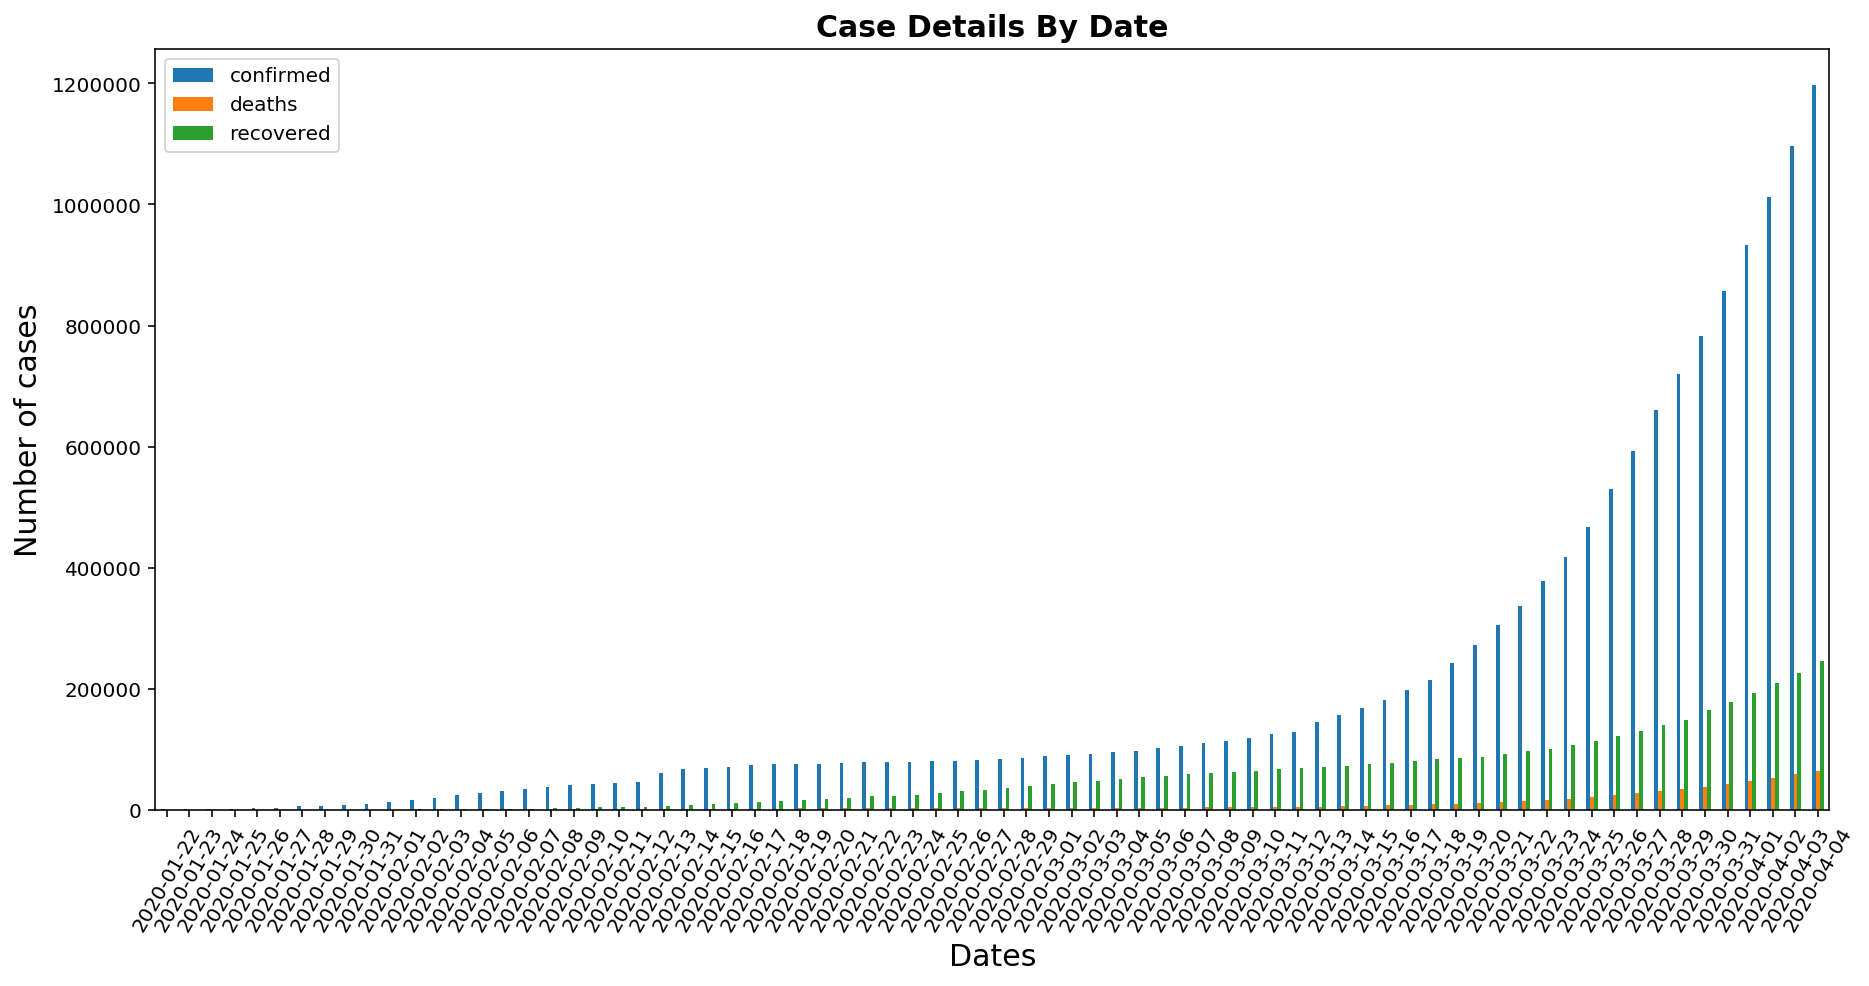

In [15]:
#setting the image size
plt.rcParams['figure.figsize']=(15,7)

#plotting the cases by date
covid19.groupby(['observationdate']).sum().plot(kind='bar');
plt.xticks(rotation=60);
plt.title('Case Details By Date', fontsize = 15 ,weight = 'bold');
plt.ylabel('Number of cases',fontsize=15);
plt.xlabel('Dates',fontsize=15);

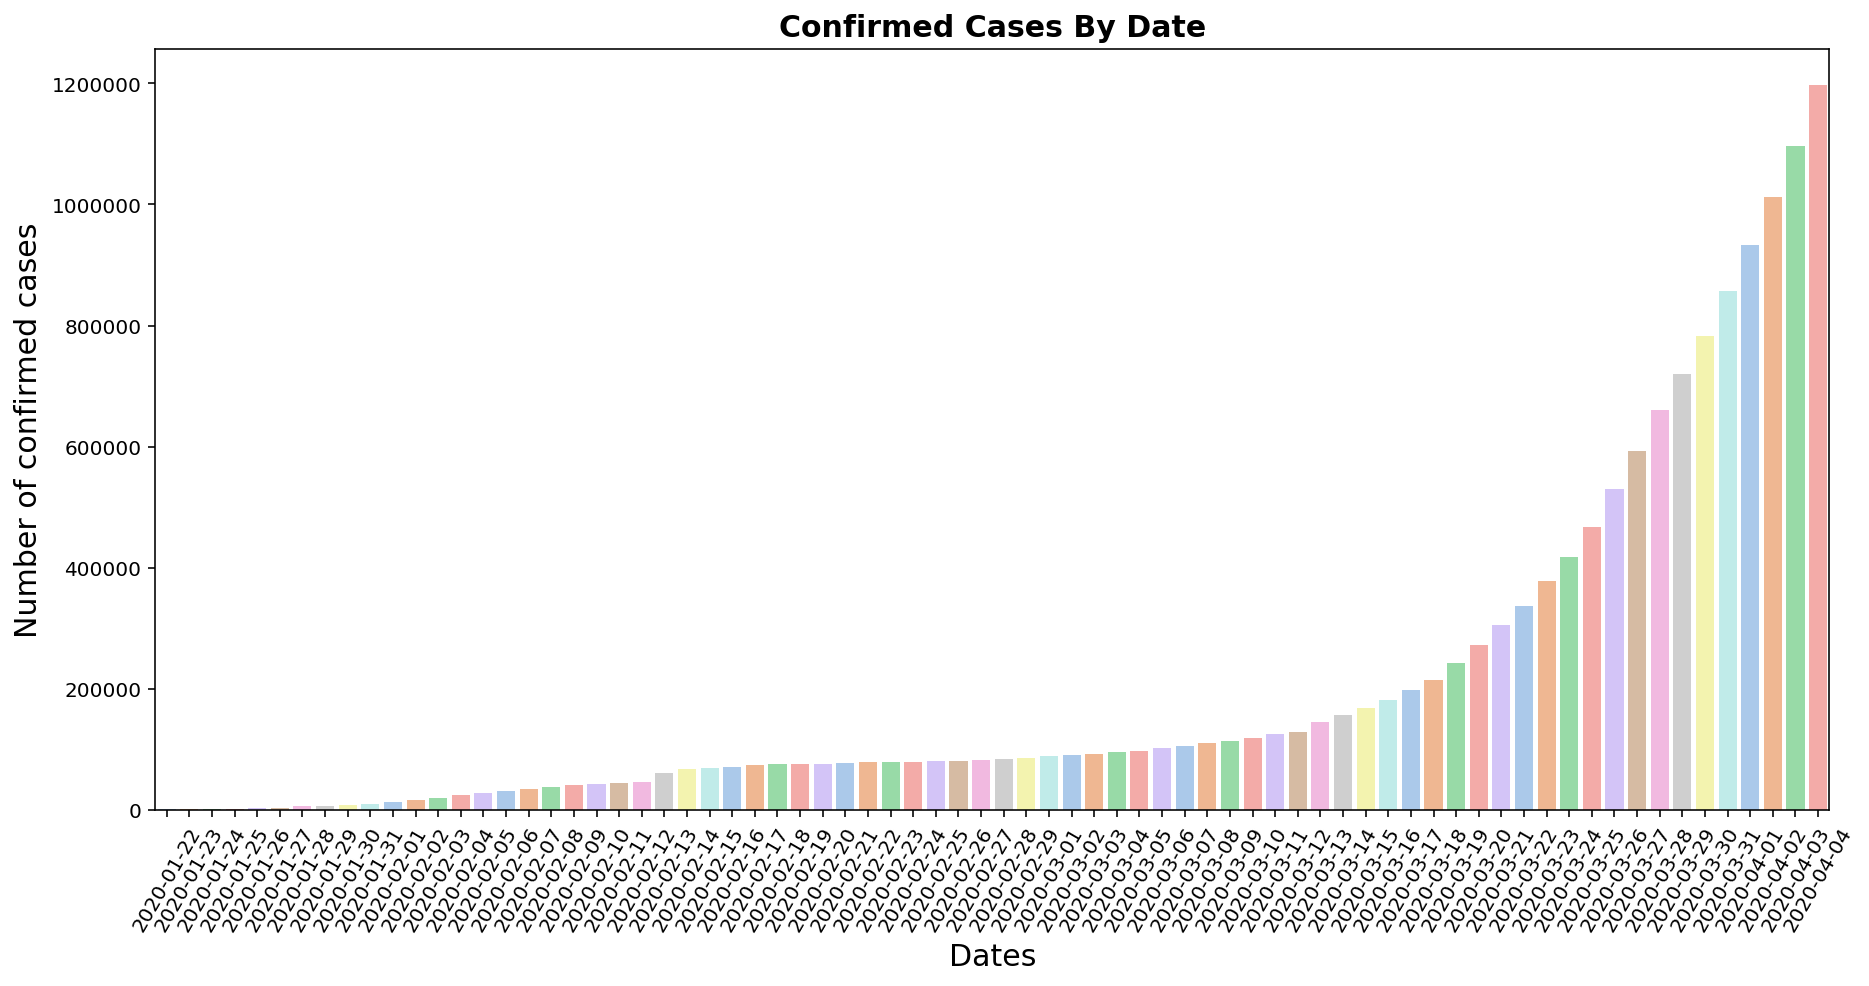

In [16]:
sns.axes_style("whitegrid")
sns.barplot(x="observationdate",
            y="confirmed",
            data=covid19.groupby(['observationdate']).sum().reset_index(drop=None),
            palette=sns.color_palette("pastel", 15));

plt.xticks(rotation=60);
plt.title('Confirmed Cases By Date', fontsize = 15 ,weight = 'bold')
plt.ylabel('Number of confirmed cases',fontsize=15);
plt.xlabel('Dates',fontsize=15);

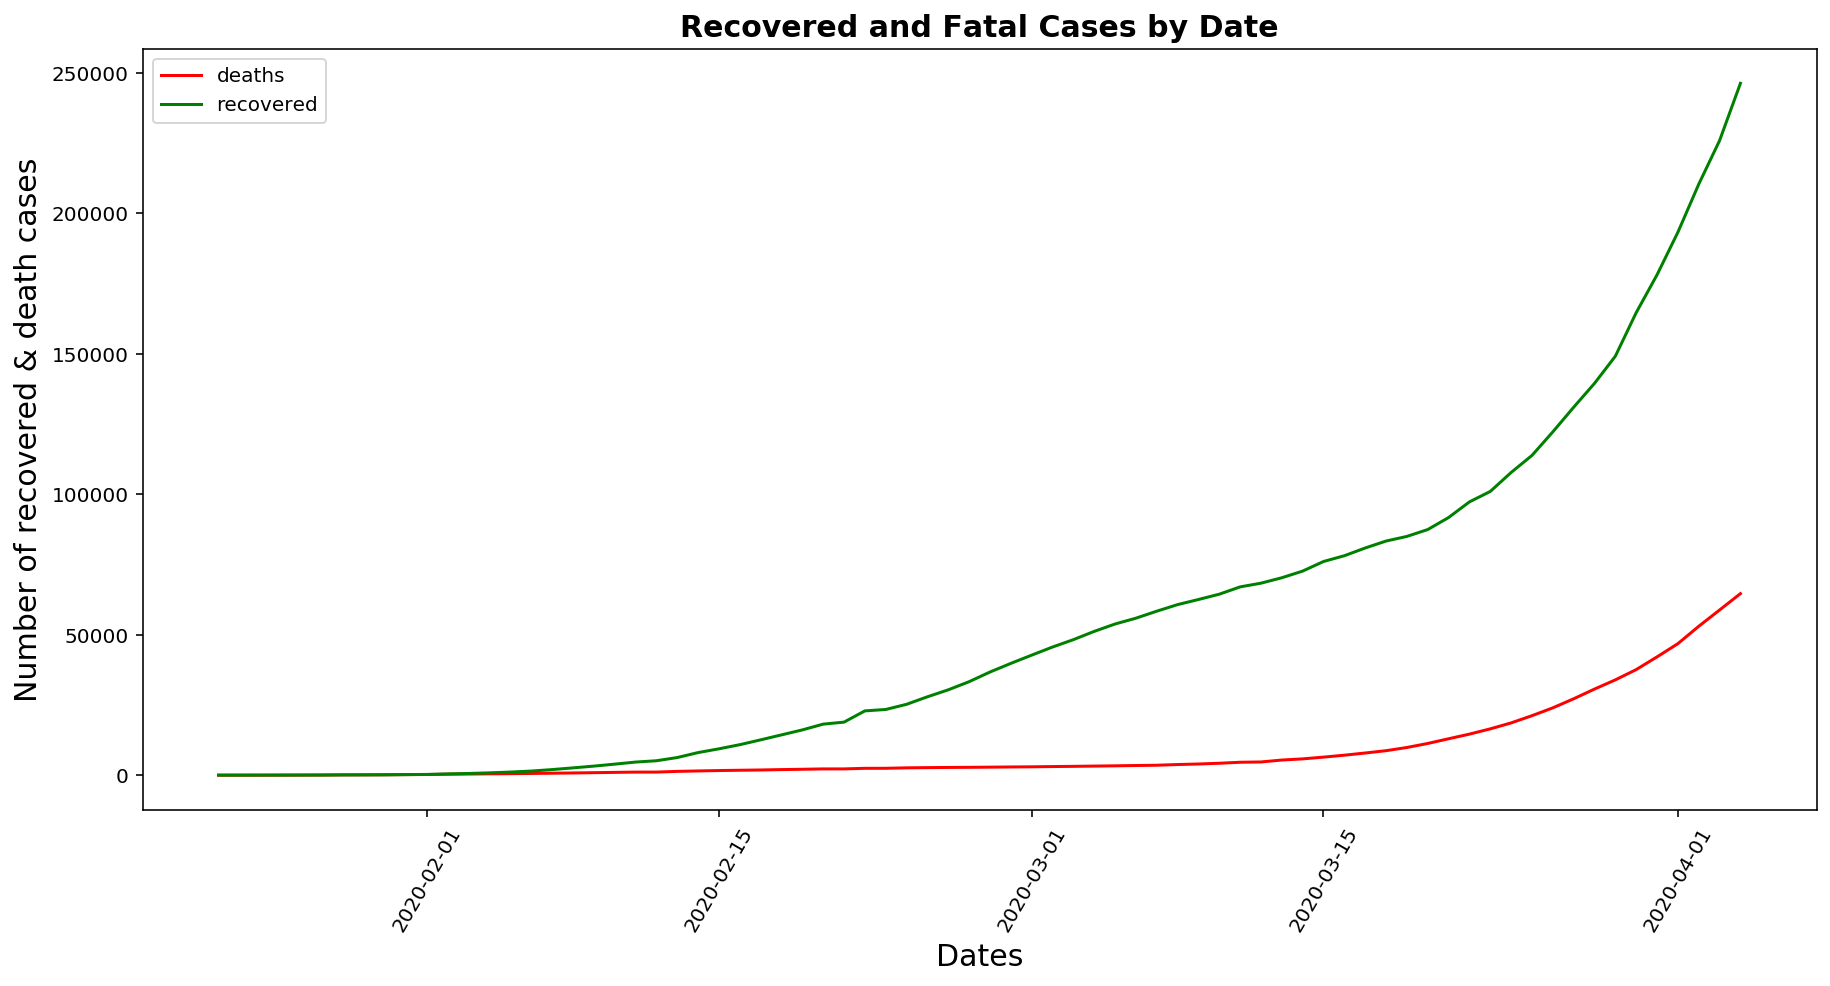

In [17]:
#plotting two line plots for deaths and recoveries respectively
plt.plot('observationdate', 'deaths', data=covid19.groupby(['observationdate']).sum().reset_index(drop=None), color='red')
plt.plot('observationdate', 'recovered', data=covid19.groupby(['observationdate']).sum().reset_index(drop=None), color='green')
plt.title('Recovered and Fatal Cases by Date', fontsize = 15 ,weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('Number of recovered & death cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

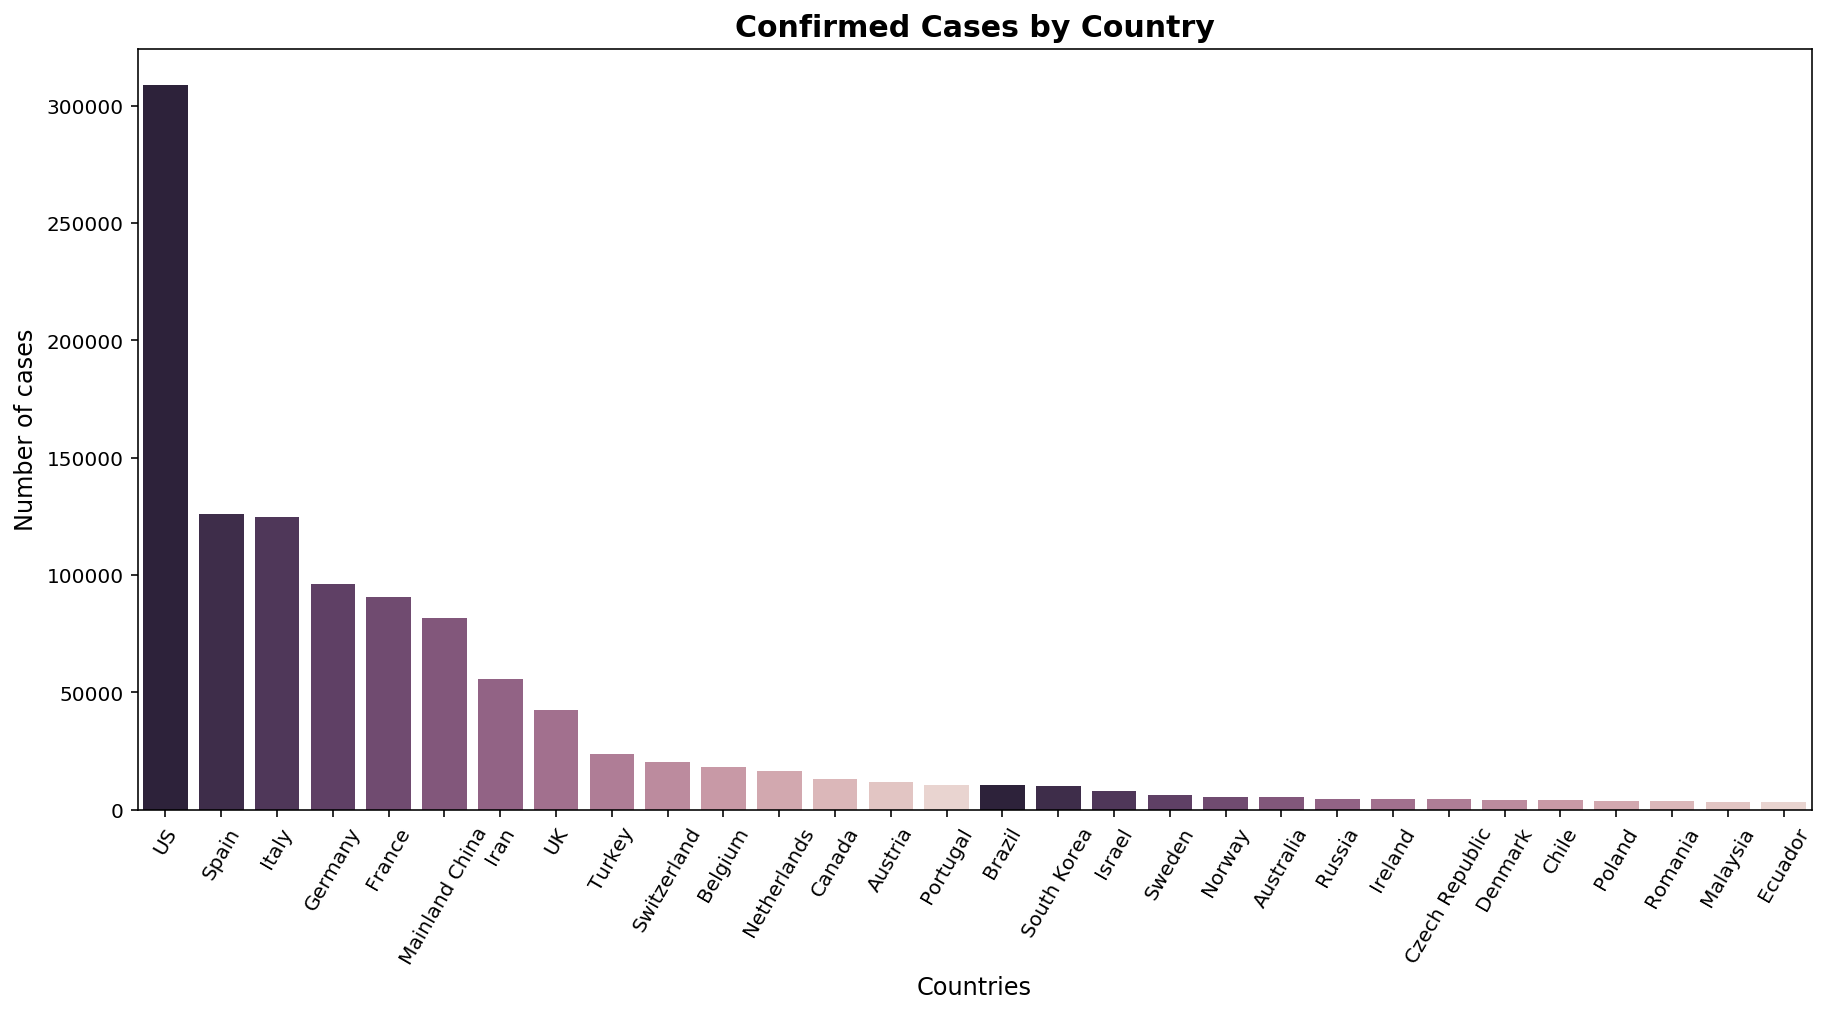

In [18]:
# bar plot to compare countries by confirmed cases
cases_by_country.sort_values(by = 'confirmed', ascending = False, inplace = True) # sorting df by confirmed cases 
sns.barplot(x= 'country_region',
            y="confirmed",
            data=cases_by_country.head(30),
            palette=sns.cubehelix_palette(15, reverse=True)
           )
plt.title('Confirmed Cases by Country', fontsize = 15, weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=12)
plt.xlabel('Countries',fontsize=12);

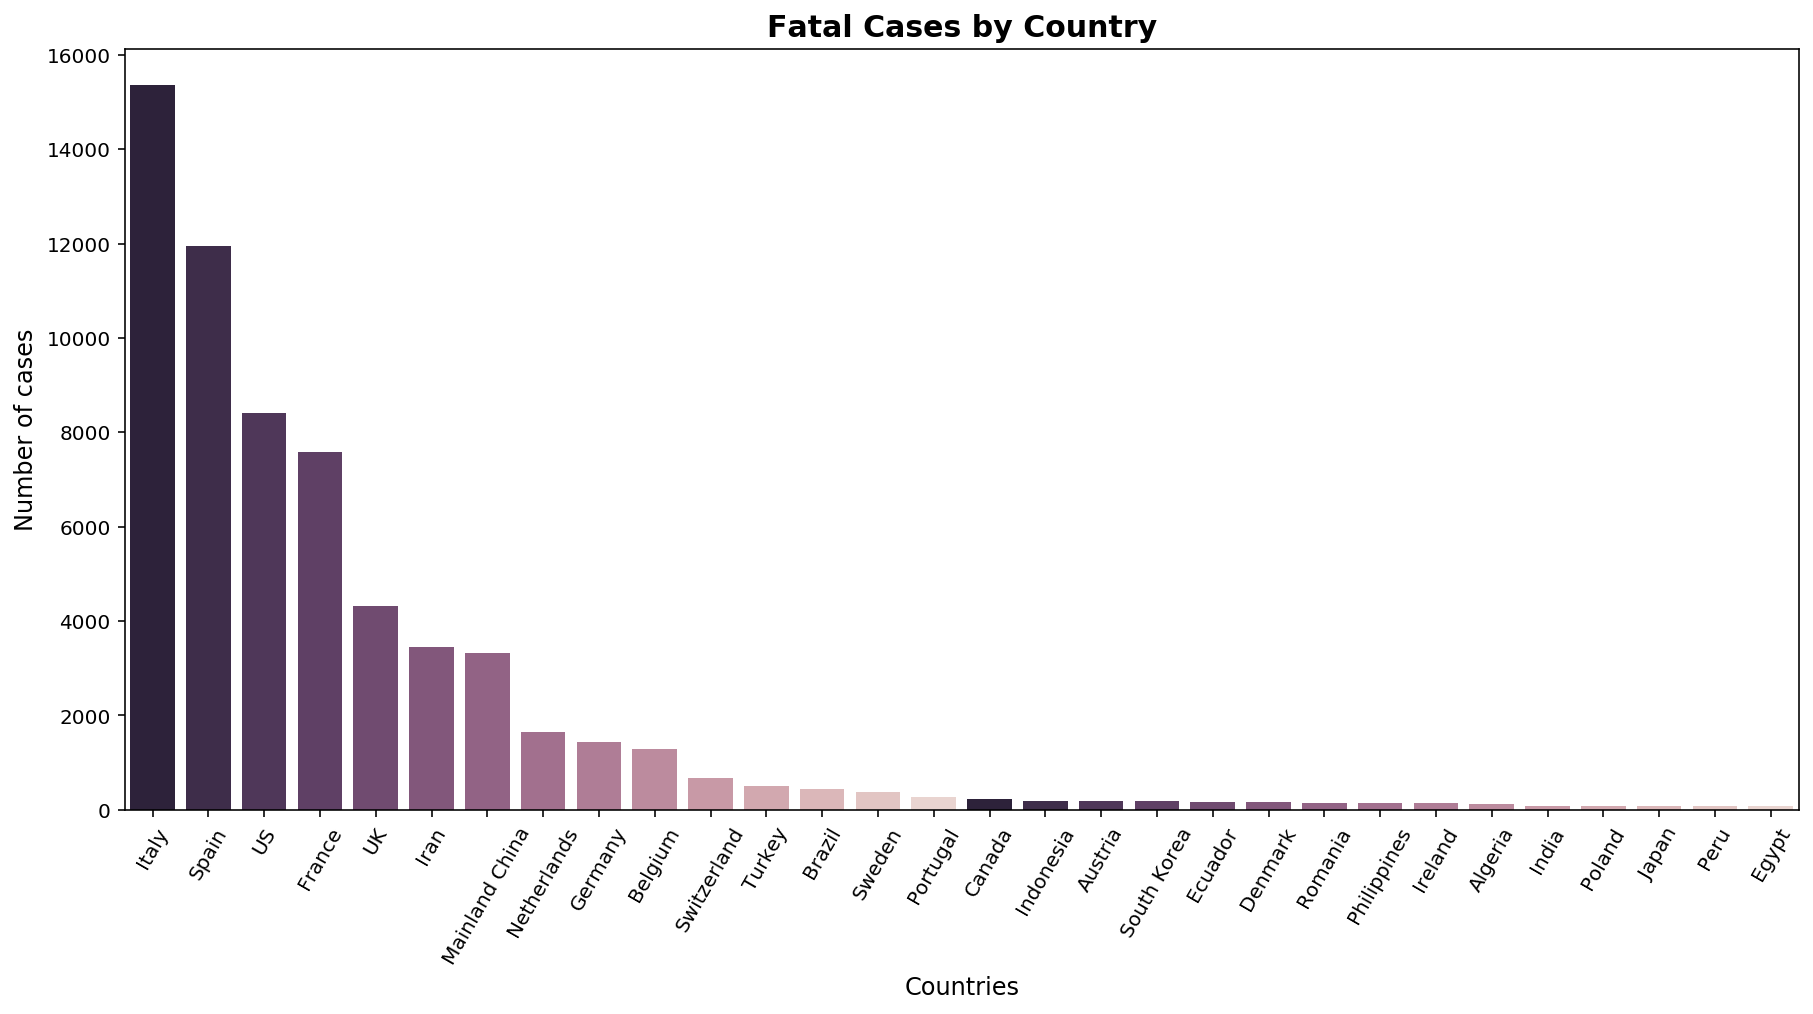

In [19]:
# bar plot to compare countries by fatalities
cases_by_country.sort_values(by = 'deaths', ascending = False, inplace = True) # sorting df by fatal cases 
sns.barplot(x= 'country_region',
            y="deaths",
            data=cases_by_country.head(30),
            palette=sns.cubehelix_palette(15, reverse=True)
           )

plt.title('Fatal Cases by Country', fontsize = 15, weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=12)
plt.xlabel('Countries',fontsize=12);

In [20]:
# total number of confirmed cases by country
cases_by_city = covid19.groupby(['province_state','observationdate'])[['confirmed','deaths','recovered']].sum().reset_index(drop=None)
cases_by_city = cases_by_city[cases_by_city.observationdate == cases_by_city.observationdate.max()]
type(cases_by_city)

pandas.core.frame.DataFrame

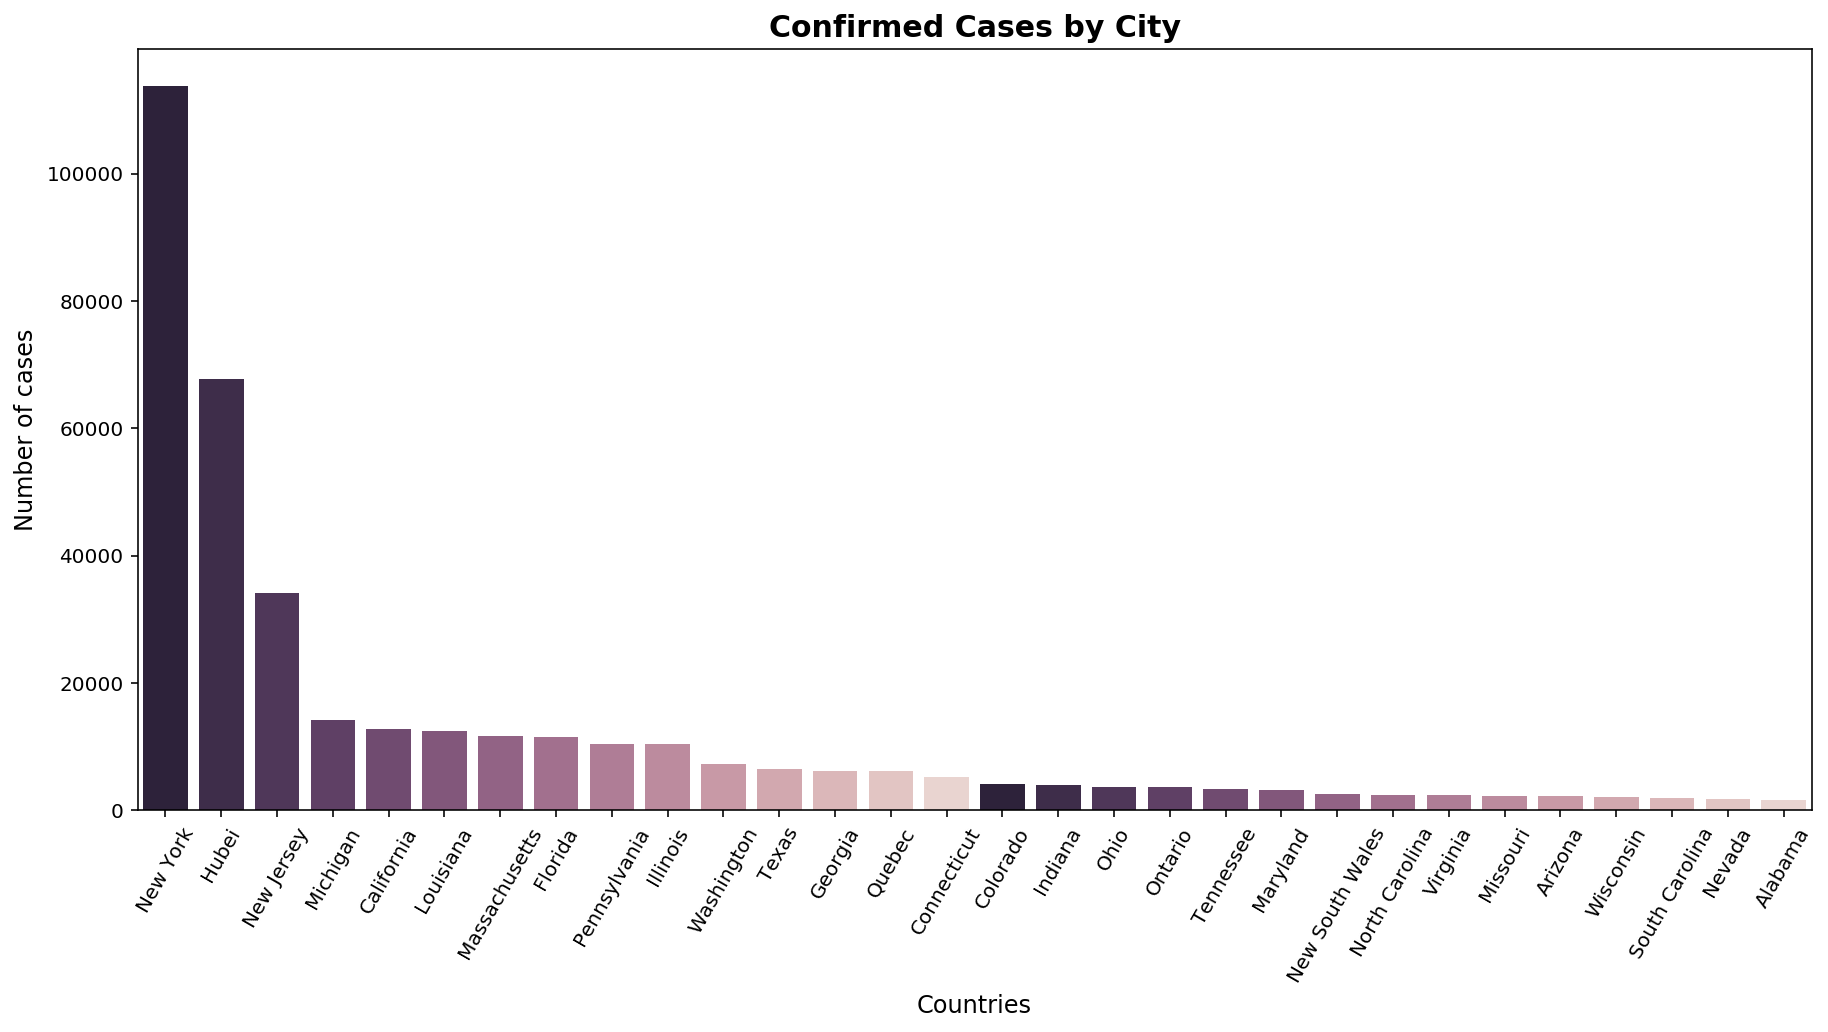

In [21]:
# bar plot to compare citities by confirmed cases
cases_by_city.sort_values(by = 'confirmed', ascending = False, inplace = True) # sorting df by confirmed cases 
sns.barplot(x= 'province_state',
            y="confirmed",
            data=cases_by_city.head(30),
            palette=sns.cubehelix_palette(15, reverse=True)
           )
plt.title('Confirmed Cases by City', fontsize = 15, weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=12)
plt.xlabel('Countries',fontsize=12);

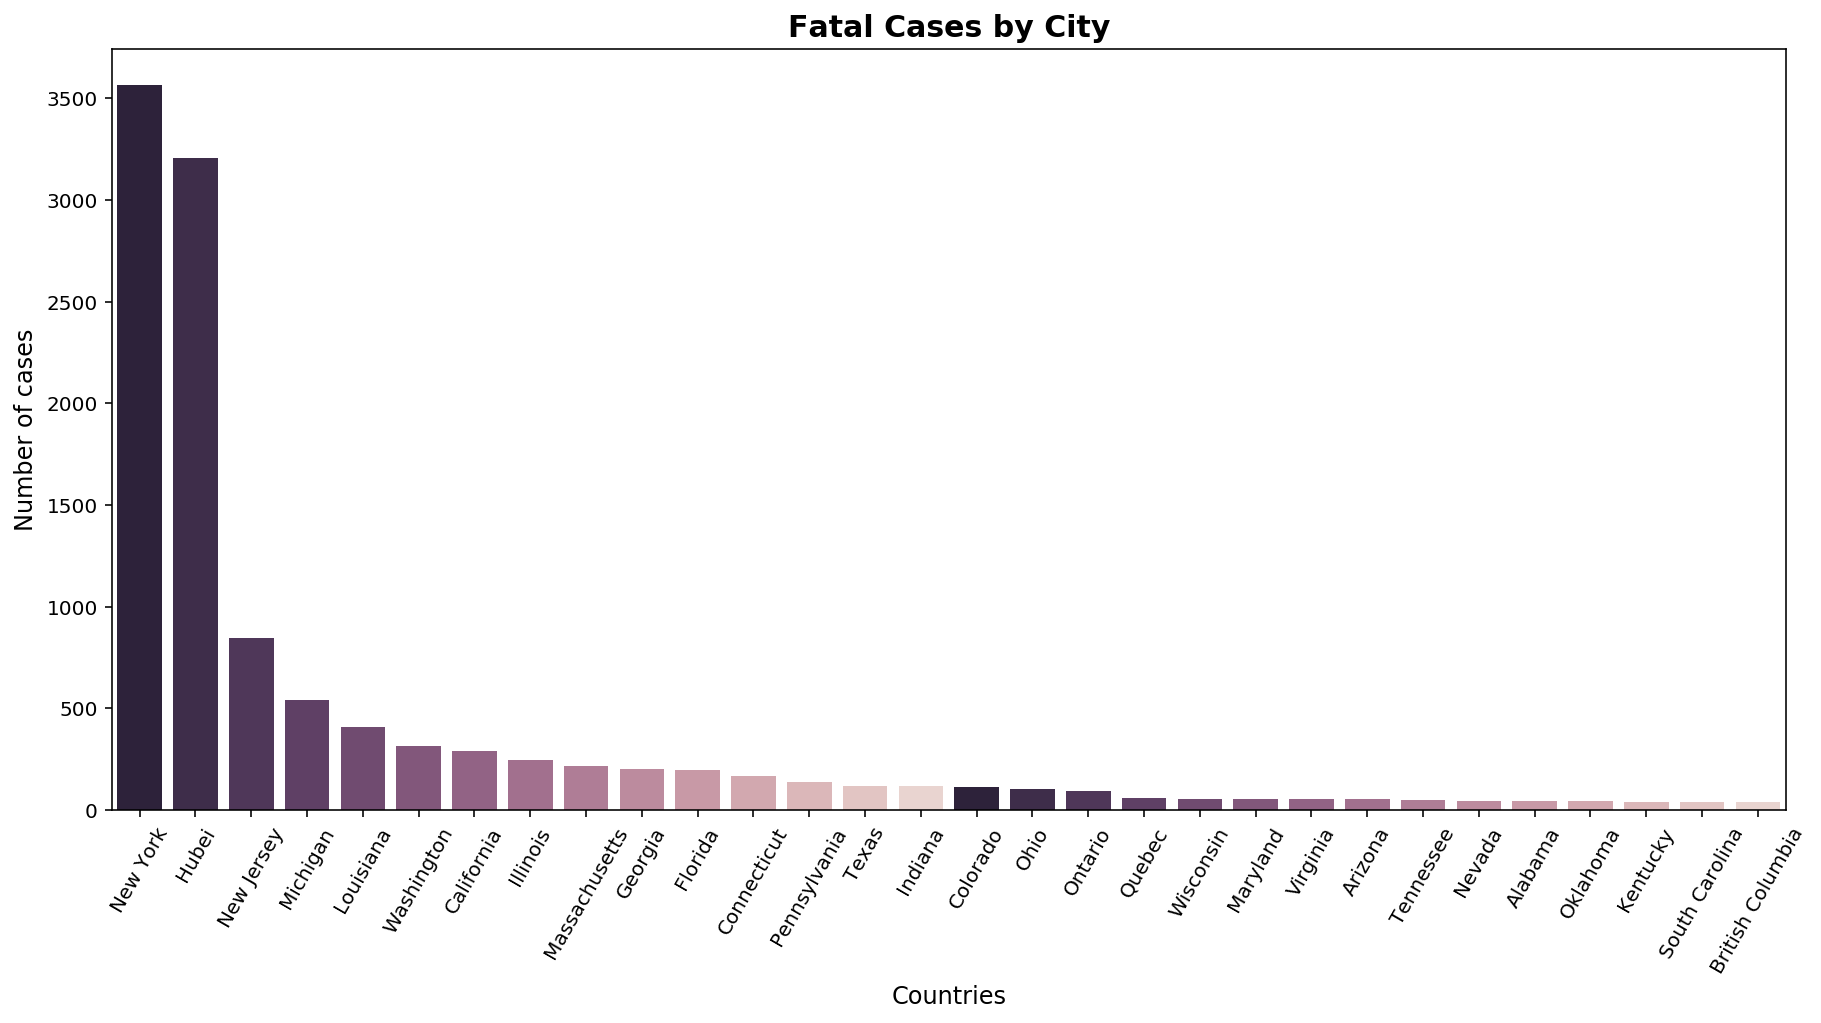

In [22]:
# bar plot to compare cities by fatalities
cases_by_city.sort_values(by = 'deaths', ascending = False, inplace = True) # sorting df by fatal cases 
sns.barplot(x= 'province_state',
            y="deaths",
            data=cases_by_city.head(30),
            palette=sns.cubehelix_palette(15, reverse=True)
           )

plt.title('Fatal Cases by City', fontsize = 15, weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=12)
plt.xlabel('Countries',fontsize=12);

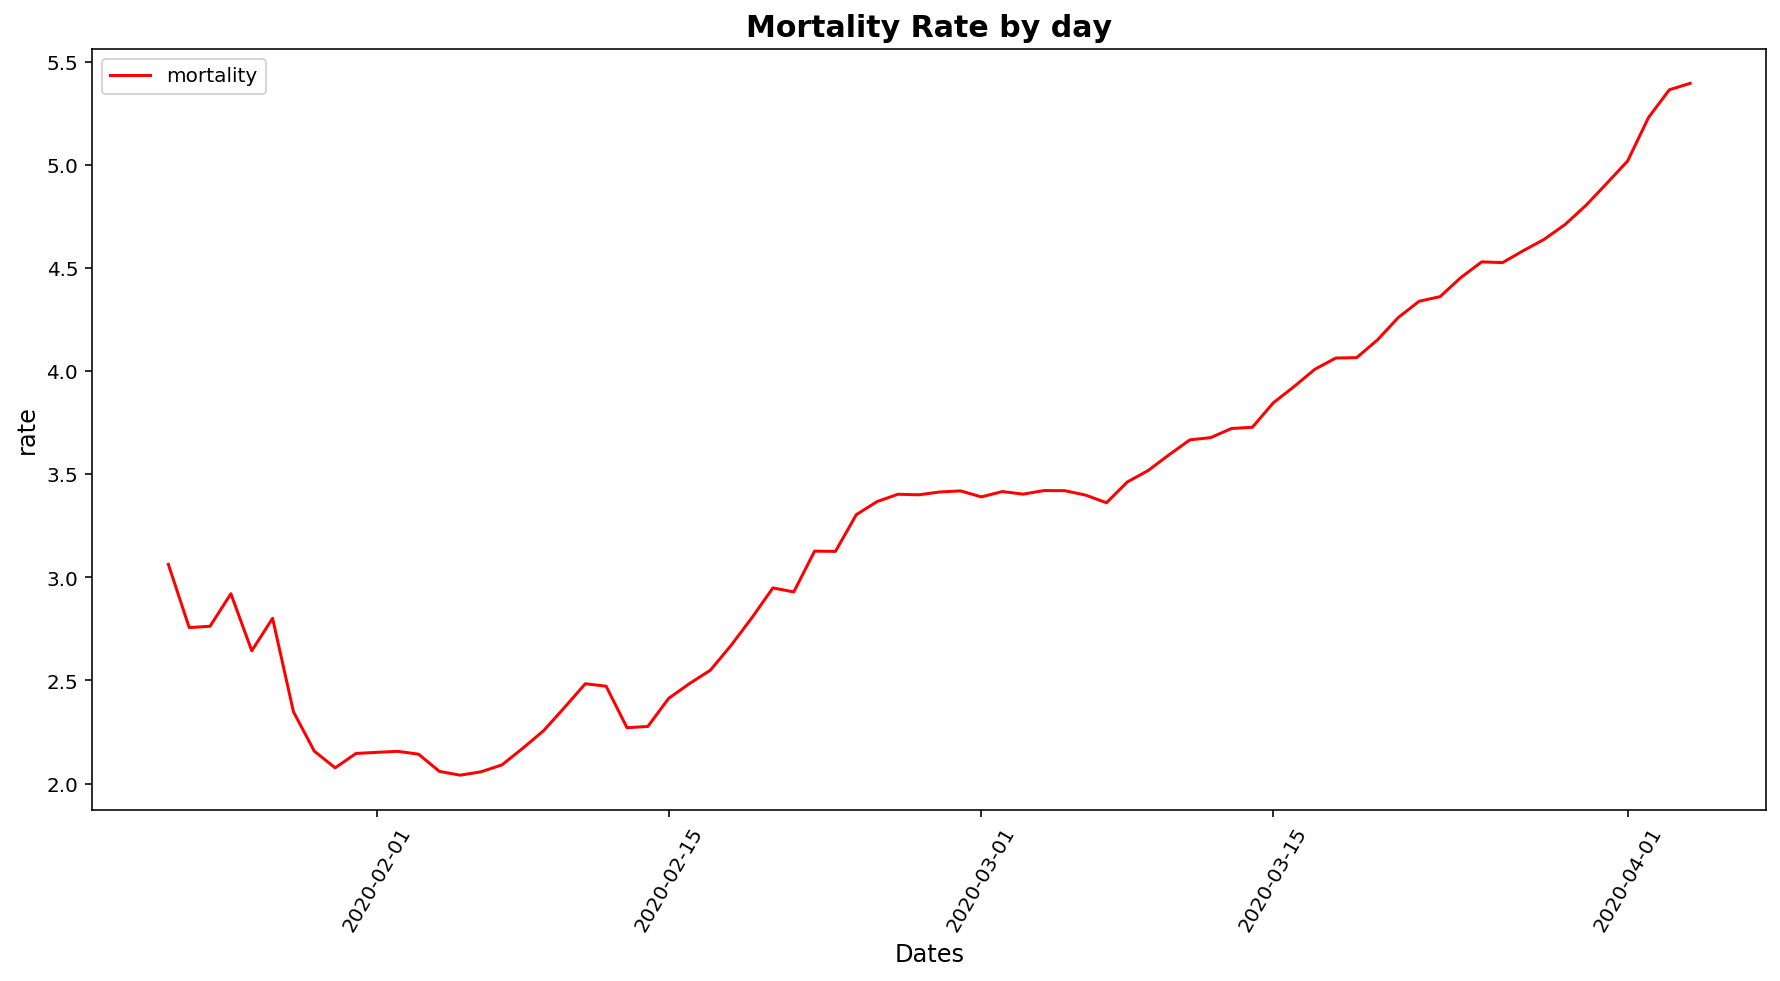

In [23]:
#plotting mortality rates
plt.plot('observationdate', 'mortality', data=cases_by_date.groupby(['observationdate']).sum().reset_index(drop=None), color='red')
# plt.plot('observationdate', 'recovered', data=covid19.groupby(['observationdate']).sum().reset_index(drop=None), color='green')
plt.title('Mortality Rate by day', fontsize = 15 ,weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('rate',fontsize=12)
plt.xlabel('Dates',fontsize=12)
plt.legend()
plt.show()

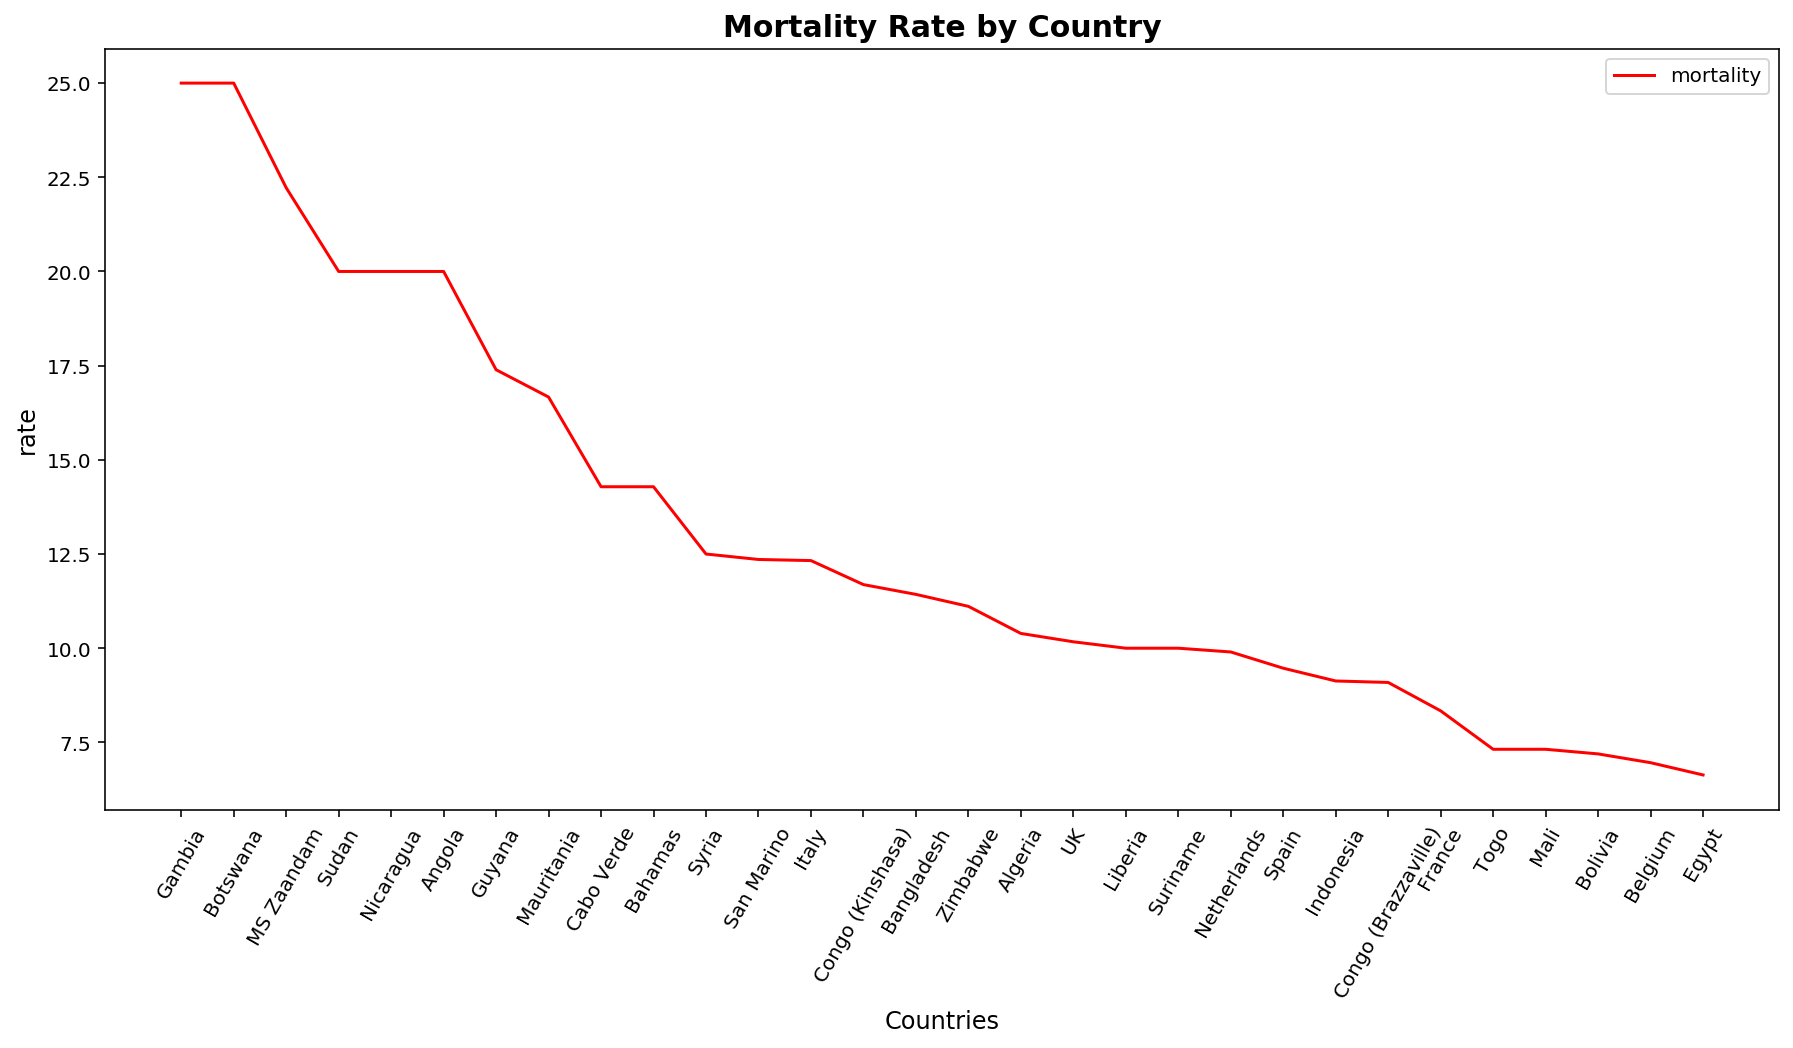

In [24]:
#plotting mortality rates
plt.plot('country_region', 'mortality', data=cases_by_country.sort_values(by = 'mortality', ascending = False).head(30).reset_index(drop=None), color='red')
# plt.plot('observationdate', 'recovered', data=covid19.groupby(['observationdate']).sum().reset_index(drop=None), color='green')
plt.title('Mortality Rate by Country', fontsize = 15 ,weight = 'bold')
plt.xticks(rotation=60)
plt.ylabel('rate',fontsize=12)
plt.xlabel('Countries',fontsize=12)
plt.legend()
plt.show()

### Modeling